## Importing the required libraries

In [1]:
# library required for structured Python code

%load_ext nb_black

<IPython.core.display.Javascript object>

In [296]:
# Libraries required for data analysis and visualisation

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)  # adds background to the graph

<IPython.core.display.Javascript object>

In [297]:
# Library to build linear regression model

from sklearn.linear_model import LinearRegression

# Library to check model performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [298]:
# Library required to suppress any warning messages

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [299]:
# Creating an array of color codes to use in this project

colors = ["#834F99", "#6E6E6D", "#FABCC9"]

# Setting custom color palette

sns.set_palette(sns.color_palette(colors))

<IPython.core.display.Javascript object>

## Loading the dataset

In [300]:
data = pd.read_csv(
    "used_cars_data.csv", index_col=0
)  # use the first column as the index

<IPython.core.display.Javascript object>

In [301]:
df = data.copy()  # creating a copy of the dataset

<IPython.core.display.Javascript object>

## Data Structure Analysis

In [302]:
# viewing top 10 observations from the dataset

df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20


<IPython.core.display.Javascript object>

**Observations**

- Serial Number is set as index
- Name is a combination of make of the car and model
- Mileage, Engine, Power and New Price values include units in them
- NaN values in the New Price column

In [303]:
# Checking the shape of the dataset

df.shape

(7253, 13)

<IPython.core.display.Javascript object>

**Observations**

- There are 7253 rows and 13 columns in all

In [304]:
# Viewing the overall information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


<IPython.core.display.Javascript object>

**Observations**

- 9 object columns including the numeric ones that need to be processed
- About 86% of the data is missing in New Price
- Around 1200 missing values in Price
- Quite a few missing values in Mileage, Engine, Power and Seats
- Memory usage by the dataset is 793.3 KB

In [305]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

**Observations**

- This gives an idea of how may values a missing per column
- New_Price has the maximum number (about 86%) of missing data

In [306]:
df.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

<IPython.core.display.Javascript object>

**Observations**

- There are a large number of unique values in the categorical columns

## Initial Data Processing

In [307]:
# Dropping New Price column as 86% of the data is missing

df.drop("New_Price", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [308]:
# str.strip() removes the leading and trailing blank spaces in a string
# str.title() returns a title-cast version of the string

df["Name"] = df["Name"].str.strip().str.title()

# Extracting the Brand Name from the Name column and storing it in a new column Manufacturer

df["Manufacturer"] = df["Name"].str.split(" ").str[0]

# Dropping the Name column

df.drop("Name", axis=1, inplace=True)

# Extracting the numeric value and typecasting it as float from Mileage and Engine

df["Mileage"] = df["Mileage"].str.split(" ").str[0].astype("float")
df["Engine"] = df["Engine"].str.split(" ").str[0].astype("float")

<IPython.core.display.Javascript object>

In [309]:
# User defined function to remove unit from power and retrieve the numeric value


def power_num(val):

    """ User defined function to remove the units in Power column """

    if isinstance(val, str):  # chks if the value is a string
        if len(val.strip()) <= 0 or val == "null bhp":
            return np.nan  # returns Nan if len(val)<=0 or val is null bhp
        else:
            return val.replace("bhp", "")  # if val is bhp replaces it with ""
    else:
        return np.nan  # else returns Nan


df["Power"] = df["Power"].apply(power_num)  # applying the function to Power
df["Power"] = df["Power"].astype("float")  # typecasting Power as float

<IPython.core.display.Javascript object>

In [310]:
# Checking if all the above changes are imputed

df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer
S.No.,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


<IPython.core.display.Javascript object>

**Observations**

- The data is set now

In [311]:
# Checking the shape of the dataset again

df.shape

(7253, 12)

<IPython.core.display.Javascript object>

In [313]:
# Checking the statistical summary of the dataset

df.describe(include="all").T  # T returns a transpose of the summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0
Seats,7200.0,NaN,NaN,NaN,5.279722,0.81166,0.0,5.0,5.0,5.0,10.0


<IPython.core.display.Javascript object>

**Observations**

- 'Maruti' has the highest sales record
- Unique values present in categorical columns
- First hand cars are highly preferred
- Manual tranmission and Diesel cars seems to be preferred over the edge
- Mumbai city has highest sales of car
- Large differnces between the mean and median values indicate skewness in the data
- The min and max values indicate that the data points are widely distributed

# Exploratory Data Analysis

## Univariate Analysis

In [314]:
# Defining a method to print the value counts in the plots


def val_count(plot, feature):
    for p in ax.patches:
        ax.annotate(  # annotate the count
            p.get_height(),
            (
                p.get_x() + p.get_width() / 2.0,  # calculating the value counts
                p.get_height(),
            ),
            ha="center",  # horizontal alignment of the text
            va="center",  # vertical alignment
            xytext=(0, 5),  # text position
            textcoords="offset points",  # offset in points from the xy value
        )

<IPython.core.display.Javascript object>

### 1. Manufacturer

Text(0, 0.5, 'Count of cars')

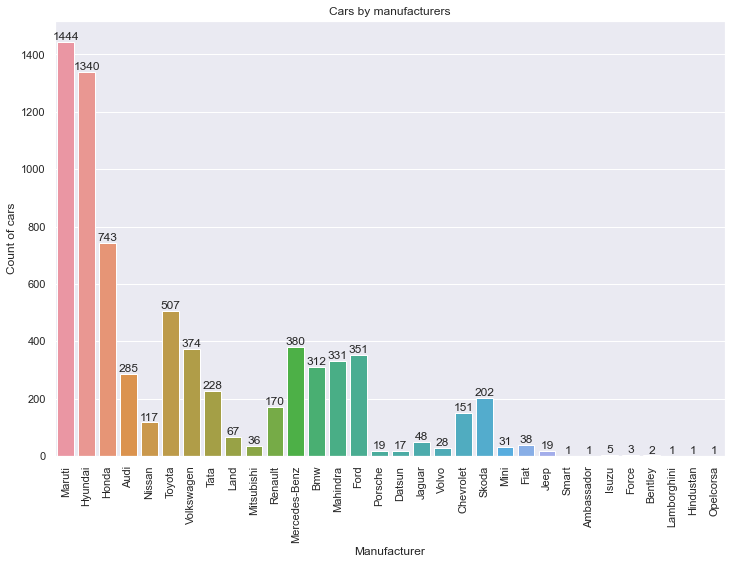

<IPython.core.display.Javascript object>

In [315]:
plt.figure(figsize=(12, 8))  # declaring the plot size

ax = sns.countplot(
    df["Manufacturer"]
)  # creating a countplot and assigning it to variable ax

val_count(
    ax, df["Manufacturer"]
)  # calling the method val_count and passing ax as the argument to get the value counts
# labelled on the plot

plt.xticks(rotation=90)  # align the labels in the X axis
plt.title("Cars by manufacturers")  # title of the plot
plt.xlabel("Manufacturer")  # specifying X and Y labels
plt.ylabel("Count of cars")

**Observations**

- Maximum number of cars in the dataset belong to 'Maruti', followed by Hyundai
- Least number of cars for a brand is 1
- No null values

### 2. Location

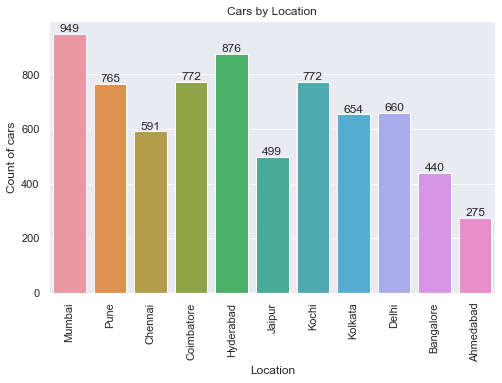

<IPython.core.display.Javascript object>

In [316]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(df["Location"])
val_count(ax, df["Location"])

plt.title("Cars by Location")
plt.ylabel("Count of cars")
plt.xticks(rotation=90)
plt.show()

**Observations**

- Mumbai has the higest number of sales, followed by Hyderabad
- Coimbatore and Kochi are equal
- Ahmedabad has the lowest sales

### 3. Fuel Type

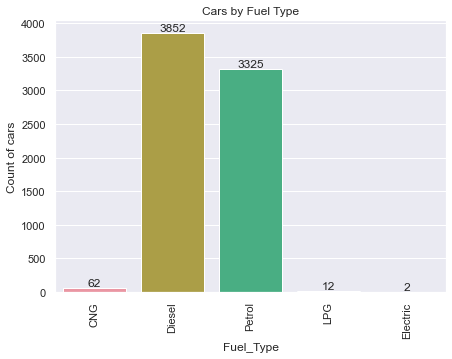

<IPython.core.display.Javascript object>

In [317]:
plt.figure(figsize=(7, 5))

ax = sns.countplot(df["Fuel_Type"])
val_count(ax, df["Fuel_Type"])

plt.title("Cars by Fuel Type")
plt.ylabel("Count of cars")
plt.xticks(rotation=90)
plt.show()

**Observations**

- Cars with fuel type Diesel and Petrol are highly preferred
- Electric be the least preferred

### 4. Transmission

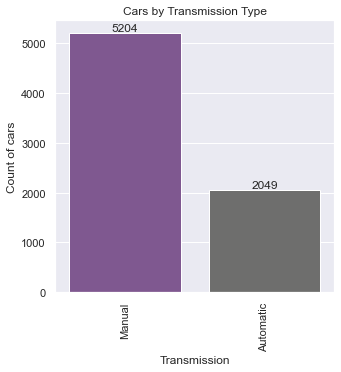

<IPython.core.display.Javascript object>

In [318]:
plt.figure(figsize=(5, 5))

ax = sns.countplot(df["Transmission"])
val_count(ax, df["Transmission"])

plt.title("Cars by Transmission Type")
plt.ylabel("Count of cars")
plt.xticks(rotation=90)
plt.show()

**Observations**

- Manual transmission cars are preferred over automatic

### 5. Owner Type

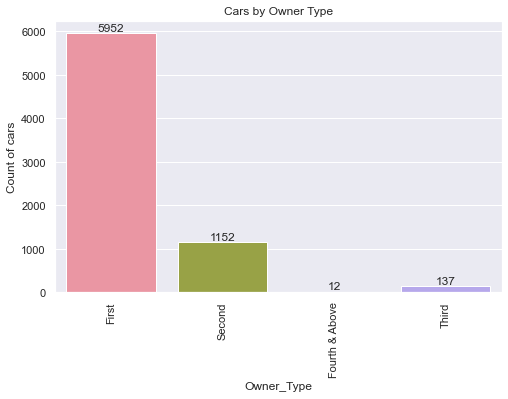

<IPython.core.display.Javascript object>

In [319]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(df["Owner_Type"])
val_count(ax, df["Owner_Type"])

plt.title("Cars by Owner Type")
plt.ylabel("Count of cars")
plt.xticks(rotation=90)
plt.show()

**Observations**

- First-hand cars have the highest frequency
- Fourth & Above is very low

### 6. Seats

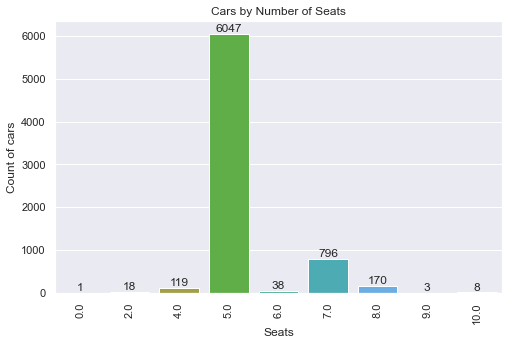

<IPython.core.display.Javascript object>

In [320]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(df["Seats"])
val_count(ax, df["Seats"])

plt.title("Cars by Number of Seats")
plt.ylabel("Count of cars")
plt.xticks(rotation=90)
plt.show()

**Observations**

- There is a data point with '0' seats that needs to be fixed
- 5-seaters are highly preferred

### 7. Year

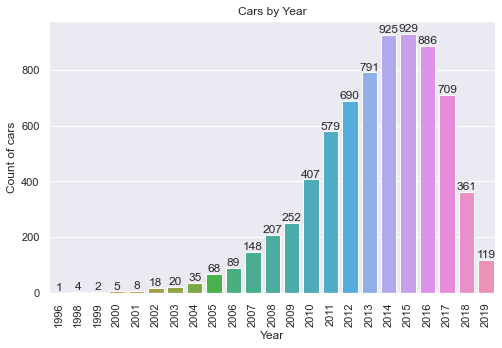

<IPython.core.display.Javascript object>

In [321]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(df["Year"])
val_count(ax, df["Year"])

plt.title("Cars by Year")
plt.ylabel("Count of cars")
plt.xticks(rotation=90)
plt.show()

**Observations**

- The user car market hit the maximum in 2015 after which it shows a trailing trend

### 8. Distribution of continuous features

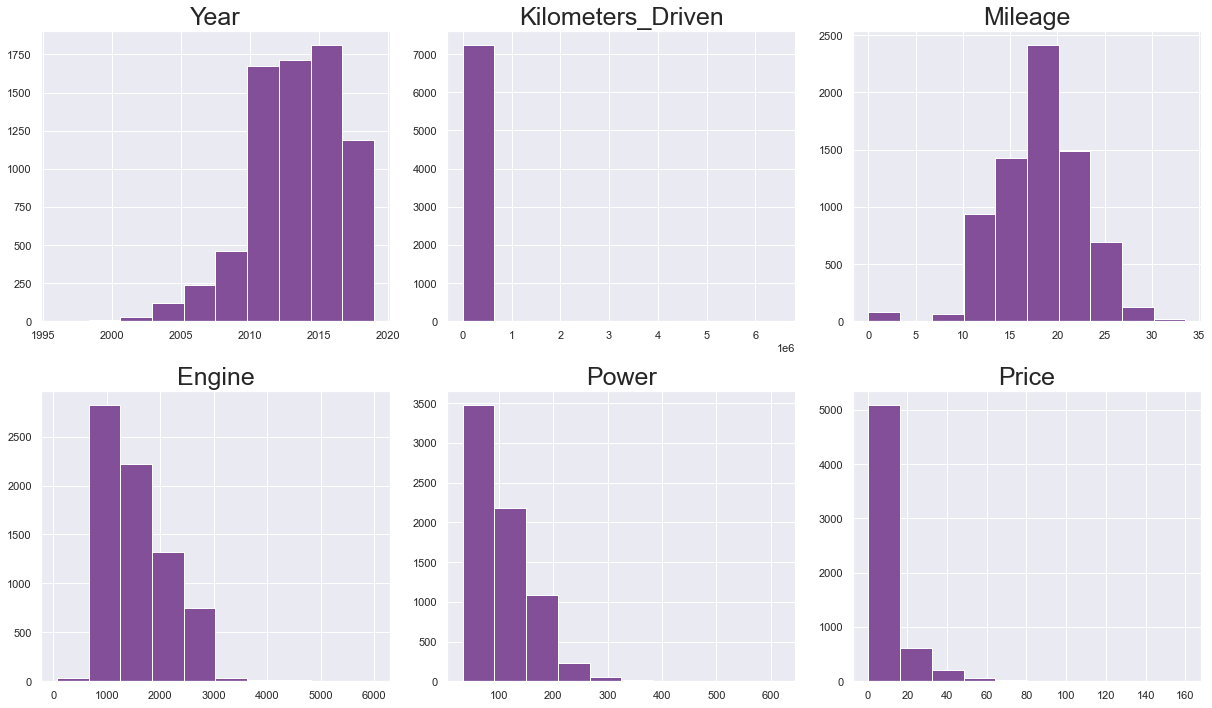

<IPython.core.display.Javascript object>

In [322]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
num_col.remove("Seats")  # Seats is discrete

plt.figure(figsize=(17, 10))

for i in range(len(num_col)):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[num_col[i]])
    plt.tight_layout()
    plt.title(num_col[i], fontsize=25)

plt.show()

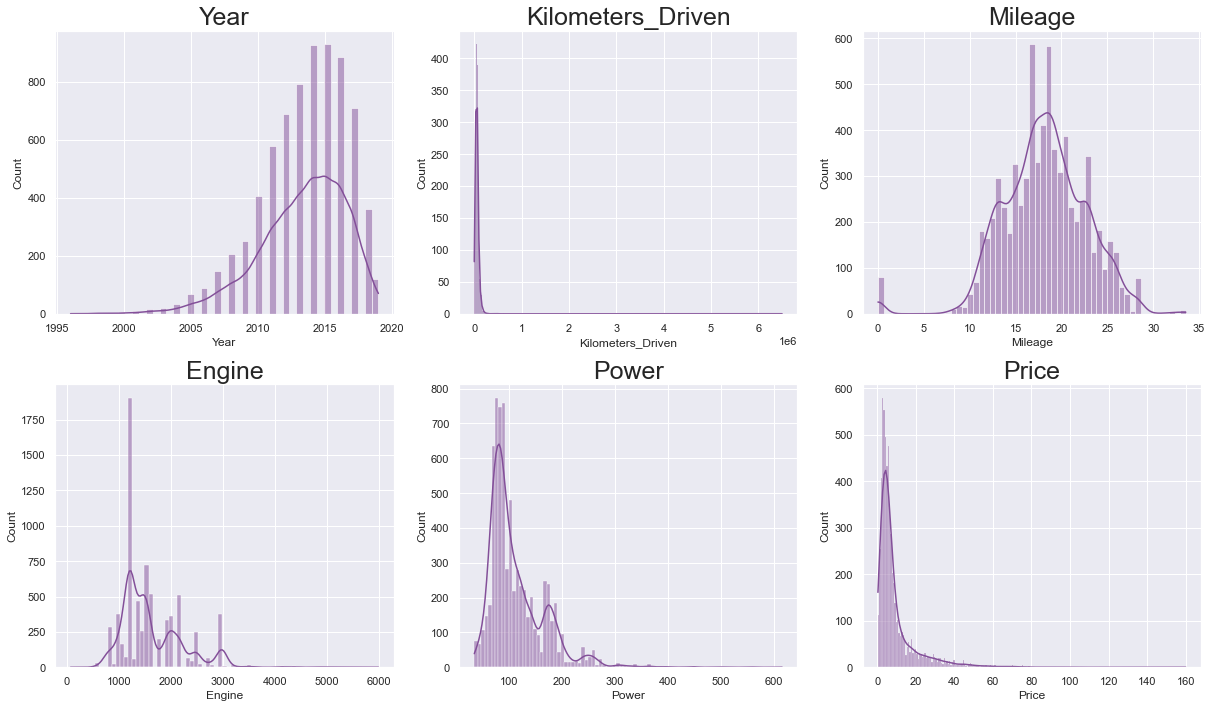

<IPython.core.display.Javascript object>

In [323]:
plt.figure(figsize=(17, 10))

for i in range(len(num_col)):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[num_col[i]], kde=True)  # to plot distribution curves
    plt.tight_layout()
    plt.title(num_col[i], fontsize=25)

plt.show()

**Observations**

- High skewness observed in Kilometers_Driven and Price
- Engine is left skewed
- The continuous features need to be scaled/transformed

## Bivariate Analysis

In [324]:
# Creating a Price_bin column for better analyais

df["Price_bin"] = pd.cut(
    df["Price"],
    [-np.inf, 1, 5, 10, 15, 19, np.inf,],
    labels=["<1L", "1-5L", "5-10L", "10-15L", "15-19L", ">19L"],
)

<IPython.core.display.Javascript object>

In [325]:
df["Price_bin"].value_counts()

1-5L      2568
5-10L     1877
>19L       740
10-15L     498
15-19L     244
<1L         92
Name: Price_bin, dtype: int64

<IPython.core.display.Javascript object>

## 1. Cars by Price

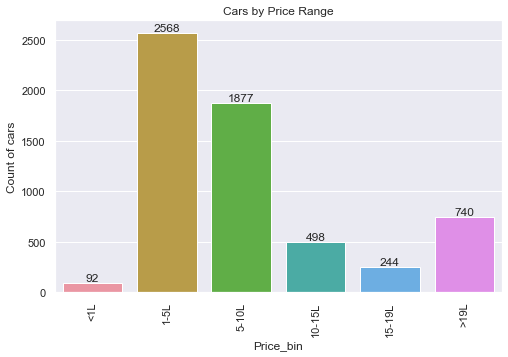

<IPython.core.display.Javascript object>

In [326]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(df["Price_bin"])
val_count(ax, df["Price_bin"])

plt.title("Cars by Price Range")
plt.ylabel("Count of cars")
plt.xticks(rotation=90)
plt.show()

**Observations**

- Maximum number of cars are in the price range 1-5L, followed by 5-10L
- 740 cars in the price range above 19L
- Only 92 cars below 1L

## 2. Price by Manufacturing year

<AxesSubplot:xlabel='Year', ylabel='Price'>

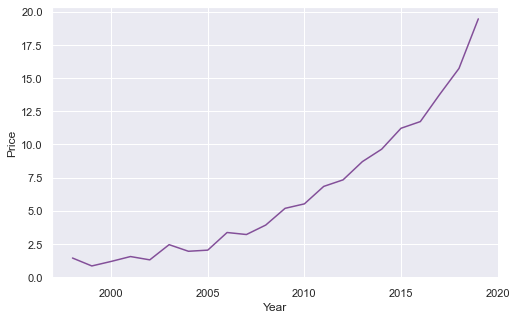

<IPython.core.display.Javascript object>

In [327]:
plt.figure(figsize=(8, 5))

sns.lineplot(y="Price", x="Year", data=df, ci=None)

**Observations**

- Newer the car model is, higher is it's price

## 3. Price vs Kilometers Driven

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

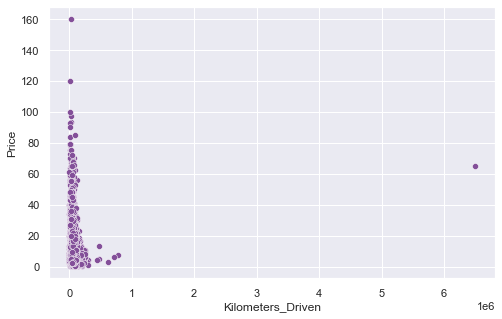

<IPython.core.display.Javascript object>

In [328]:
plt.figure(figsize=(8, 5))

sns.scatterplot(y="Price", x="Kilometers_Driven", data=df)

**Observations**

- Lower the kilometers driven, the price tends to be high

## 4. Price vs Engine

<AxesSubplot:xlabel='Engine', ylabel='Price'>

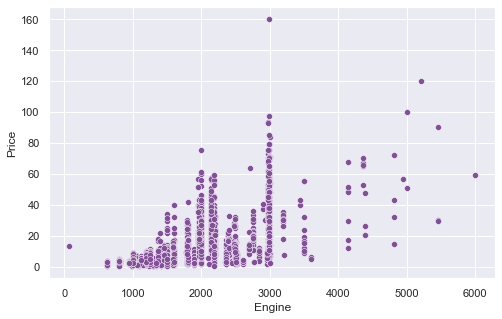

<IPython.core.display.Javascript object>

In [329]:
plt.figure(figsize=(8, 5))

sns.scatterplot(y="Price", x="Engine", data=df)

**Observations**

- Cars with high engine capacity are very few in number comparatively

## 5. Price vs Power

<AxesSubplot:xlabel='Power', ylabel='Price'>

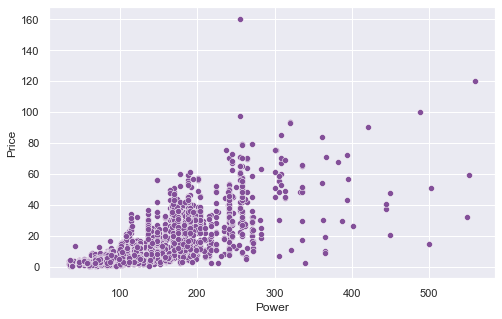

<IPython.core.display.Javascript object>

In [330]:
plt.figure(figsize=(8, 5))

sns.scatterplot(y="Price", x="Power", data=df)

**Observations**

- As the engine power increases, price also increases

## 6. Price vs Mileage

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

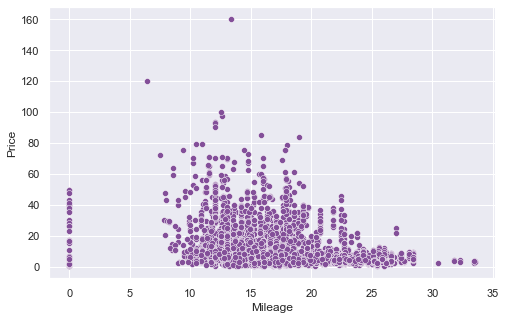

<IPython.core.display.Javascript object>

In [331]:
plt.figure(figsize=(8, 5))

sns.scatterplot(y="Price", x="Mileage", data=df)

**Observations**

- More number of cars with mileage 10 to 28 KMs

## 7. Price vs Owner Type

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

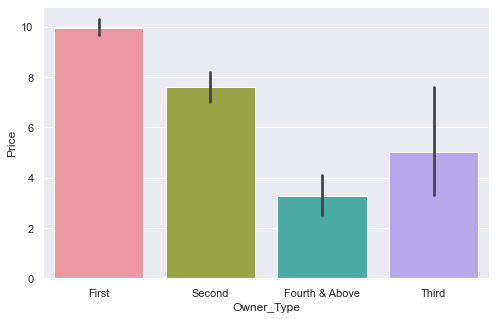

<IPython.core.display.Javascript object>

In [332]:
plt.figure(figsize=(8, 5))

sns.barplot(y="Price", x="Owner_Type", data=df)

**Observations**

- First hand cars have a higher market price followed by second and so on

## 8. Price vs Transmission

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

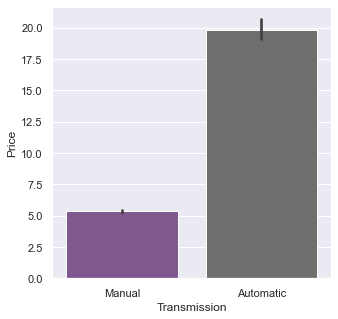

<IPython.core.display.Javascript object>

In [333]:
plt.figure(figsize=(5, 5))

sns.barplot(y="Price", x="Transmission", data=df)

**Observations**

- Automatic cars are high priced than manual cars

## 9. Price vs Seats

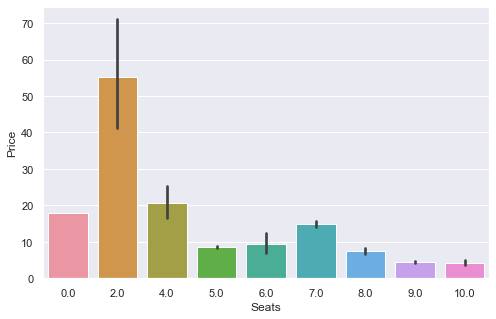

<IPython.core.display.Javascript object>

In [334]:
plt.figure(figsize=(8, 5))

sns.barplot(y="Price", x="Seats", data=df)
plt.show()

**Observations**

- 2 seater (maybe sports cars) cars are pricey followed by sedan

## 10. Price vs Location

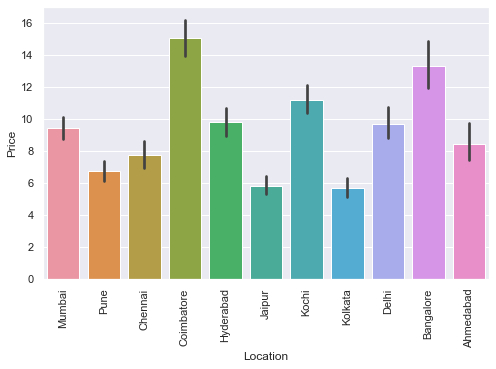

<IPython.core.display.Javascript object>

In [335]:
plt.figure(figsize=(8, 5))

sns.barplot(y="Price", x="Location", data=df)
plt.xticks(rotation=90)
plt.show()

**Observations**

- The market price seems to high in Coimbatore, followed by Bangalore and Kochi

## Multivariate Analysis

### Correlations

In [336]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Year")  # dropping Year as it is temporal variable
numeric_columns.remove("Seats")  # Seats is discrete

<IPython.core.display.Javascript object>

In [337]:
corr = (
    df[numeric_columns].corr().sort_values(by=["Price"], ascending=False)
)  # sorting correlations w.r.t Price

<IPython.core.display.Javascript object>

<AxesSubplot:>

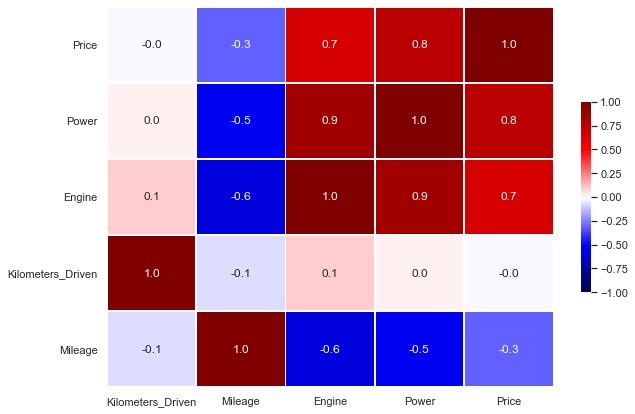

<IPython.core.display.Javascript object>

In [338]:
f, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(
    corr,
    cmap="seismic",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

**Observations**

- Price shows high correlation with Power and Engine and a -ve correlation with Mileage
- Power and Engine has the highest correlation of 0.9
- Mileage has negative correlation with Engine and Power
- Engine and Kilometers_Driven have the maximum correlation

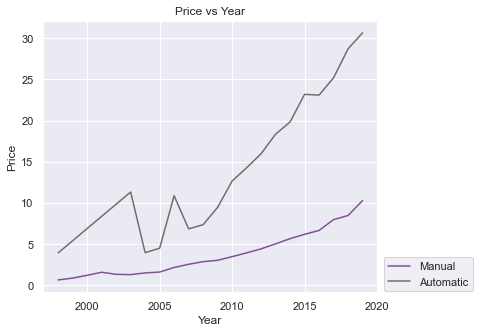

<IPython.core.display.Javascript object>

In [339]:
plt.figure(figsize=(6, 5))
sns.lineplot(
    y="Price", x="Year", data=df, ci=None, hue="Transmission"
)  # defining a lineplot
plt.title("Price vs Year")  # giving a title to the plot
plt.legend(bbox_to_anchor=(1.3, 0.15))  # positioning the index keys
plt.show()

**Observations**

- Automatic cars show a hike in the recent years
- Overall cars with both the transmission types show an increasing trend

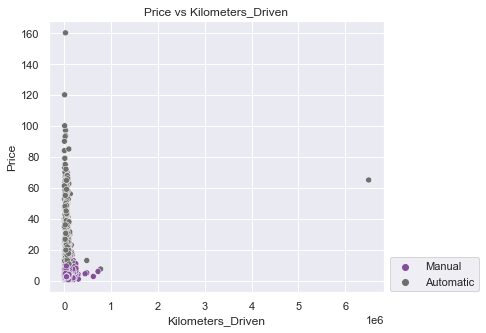

<IPython.core.display.Javascript object>

In [340]:
plt.figure(figsize=(6, 5))
sns.scatterplot(y="Price", x="Kilometers_Driven", data=df, hue="Transmission")
plt.title("Price vs Kilometers_Driven")
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.show()

**Observations**

- Automatic cars have higher price range than manual cars
- Price is high if Kilometers_Driven is less

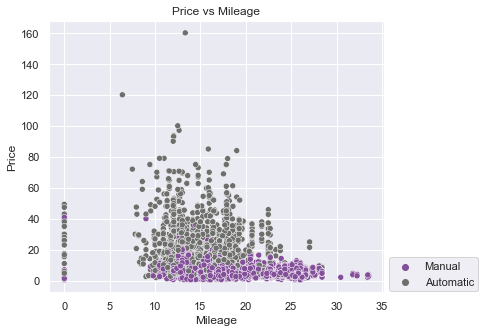

<IPython.core.display.Javascript object>

In [341]:
plt.figure(figsize=(6, 5))
sns.scatterplot(y="Price", x="Mileage", data=df, hue="Transmission")
plt.title("Price vs Mileage")
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()

**Observations**

- Price vs mileage show a varying trend
- Automatic cars are highly priced comparatively

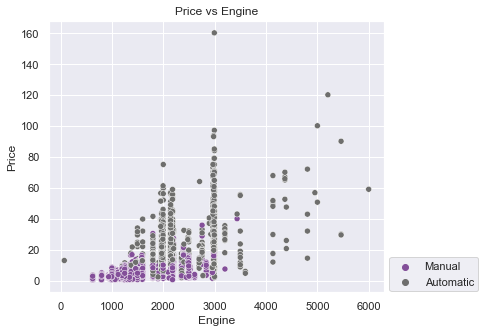

<IPython.core.display.Javascript object>

In [342]:
plt.figure(figsize=(6, 5))
sns.scatterplot(y="Price", x="Engine", data=df, hue="Transmission")
plt.title("Price vs Engine")
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()

**Observations**

- Price increases as the engine capacity increases
- Automatic cars have high capacity engines and also they are priced high comparatively

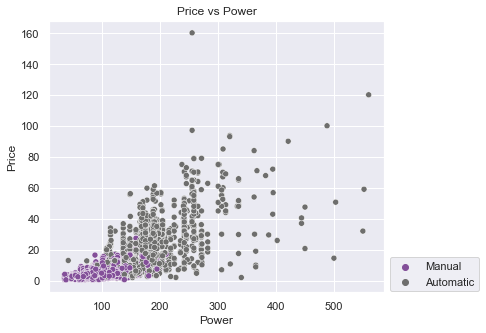

<IPython.core.display.Javascript object>

In [343]:
plt.figure(figsize=(6, 5))
sns.scatterplot(y="Price", x="Power", data=df, hue="Transmission")
plt.title("Price vs Power")
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.show()

**Observations**

- Price increases with increase in bhp
- Automatic cars have higher bhp

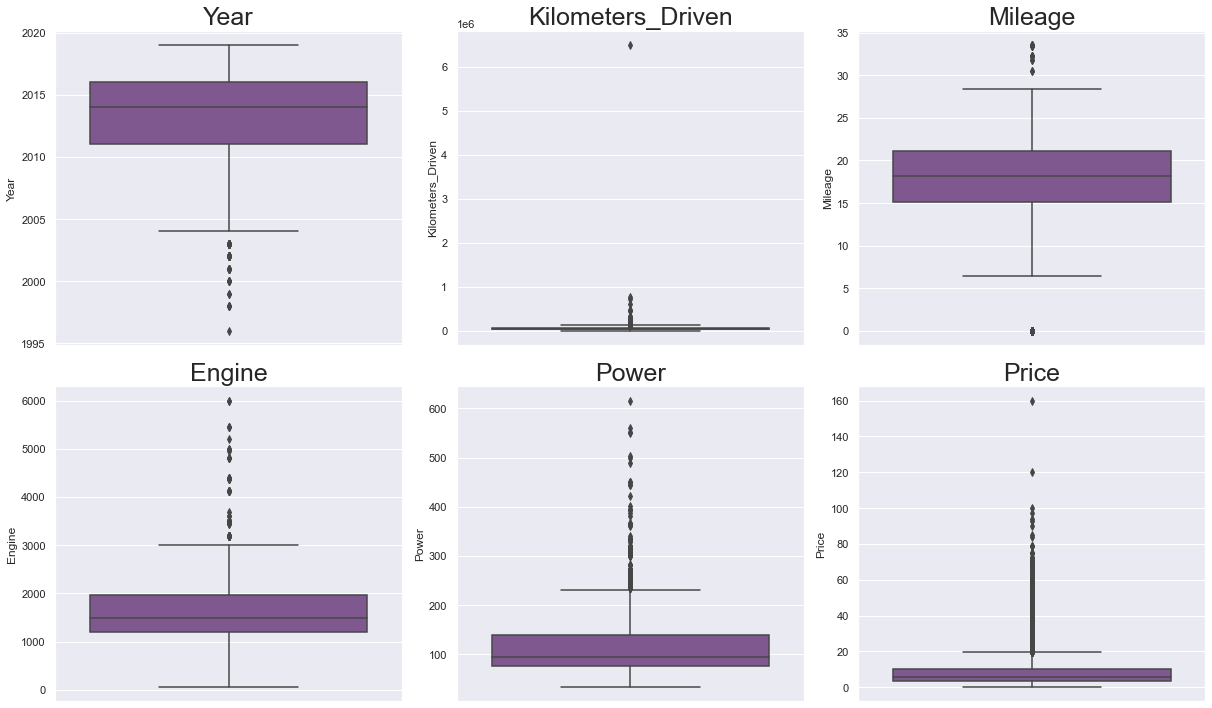

<IPython.core.display.Javascript object>

In [344]:
plt.figure(figsize=(17, 10))

for i in range(len(num_col)):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[num_col[i]])
    plt.tight_layout()
    plt.title(num_col[i], fontsize=25)

plt.show()

**Observations**

- Kilometers_Driven, Engine, Power and Price has outliers above 3rd quartile
- Year has outliers below lower whisker
- Mileage has outliers on both sides

# Data Pre-processing

## Missing Value Treatment

In [345]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
Price                1234
Manufacturer            0
Price_bin            1234
dtype: int64

<IPython.core.display.Javascript object>

In [346]:
# Dropping the rows with missing Price

df.dropna(axis=0, how="any", subset=["Price"], inplace=True)

<IPython.core.display.Javascript object>

In [347]:
df.shape

(6019, 13)

<IPython.core.display.Javascript object>

In [348]:
# checking the number of missing values after dropping 1234 rows

df.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Manufacturer           0
Price_bin              0
dtype: int64

<IPython.core.display.Javascript object>

**Observations**

- Now the missing values are considerably reduced

In [349]:
# Missing value count by row

df.isnull().sum(axis=1).sort_values(ascending=False).value_counts()

0    5872
1     107
3      36
2       4
dtype: int64

<IPython.core.display.Javascript object>

In [350]:
# Replacing missing values with median

df["Mileage"] = df["Mileage"].fillna(value=(df["Mileage"].median()))
df["Engine"] = df["Engine"].fillna(value=(df["Engine"].median()))
df["Power"] = df["Power"].fillna(value=(df["Power"].median()))
df["Seats"] = df["Seats"].fillna(value=(df["Seats"].median()))

<IPython.core.display.Javascript object>

In [351]:
# Looking at data with '0' Seats

df[df["Seats"] == 0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Price_bin
S.No.,,,,,,,,,,,,,
3999,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,97.7,0.0,18.0,Audi,15-19L


<IPython.core.display.Javascript object>

In [352]:
# Replacing the '0' in Seats column

df["Seats"] = df["Seats"].replace(0, 5)

<IPython.core.display.Javascript object>

In [353]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Manufacturer         0
Price_bin            0
dtype: int64

<IPython.core.display.Javascript object>

**Observations**

- Data has no more missing values

## Outliers in numerical column

In [358]:
num_col

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

<IPython.core.display.Javascript object>

In [359]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
num_col.remove(
    "Price"
)  # since it is the target variable, not applying outlier treatment

<IPython.core.display.Javascript object>

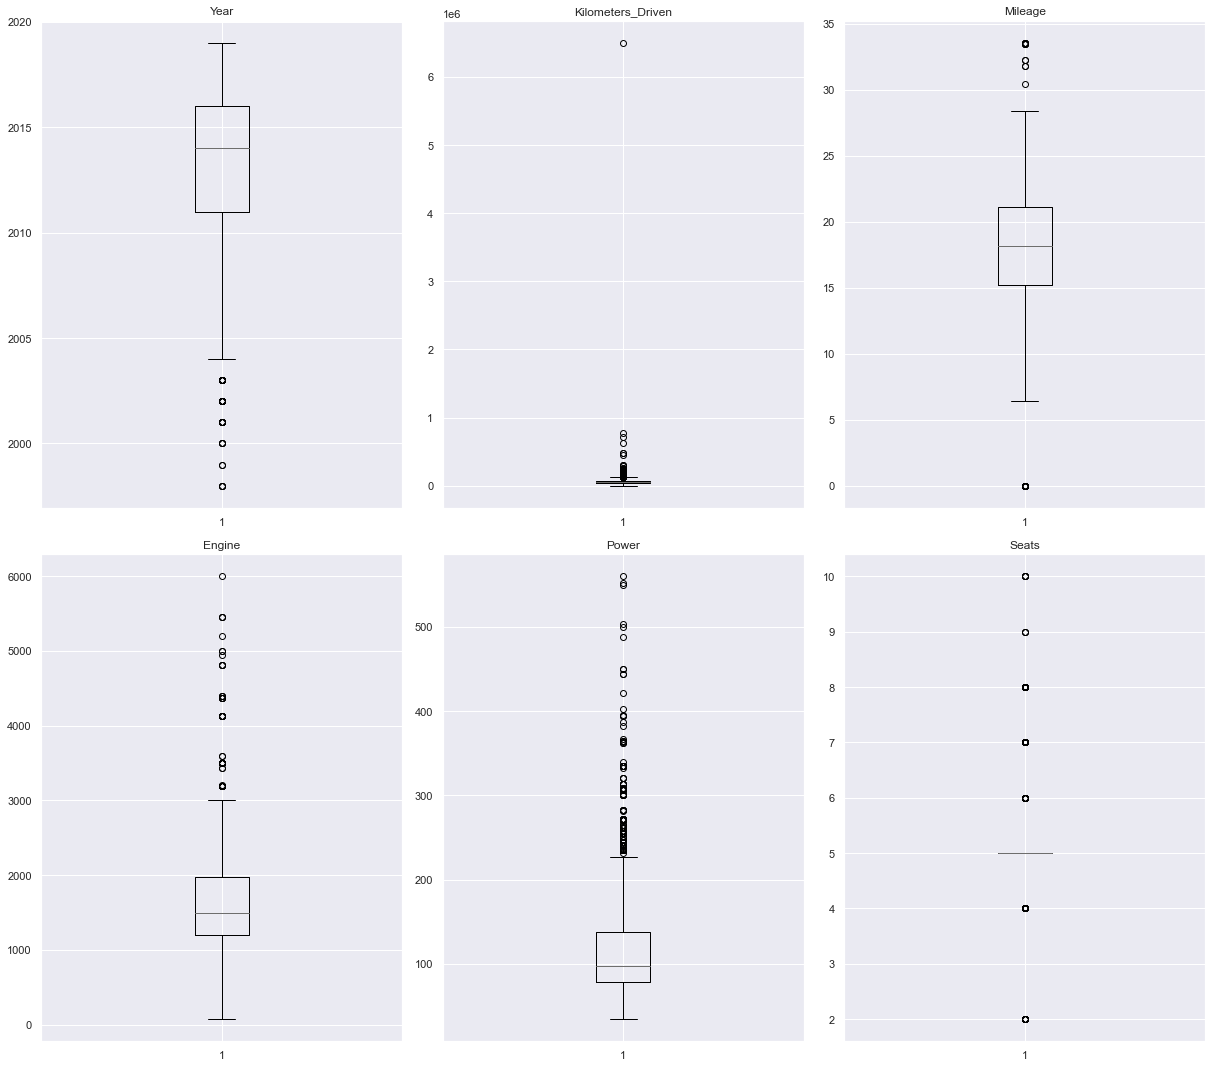

<IPython.core.display.Javascript object>

In [360]:
# Boxplots of numerical columns to view the outliers

plt.figure(figsize=(17, 15))

for i, variable in enumerate(num_col):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


# Outlier Treatment

In [361]:
# User defined function to floor and cap the outliers


def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """

    Q1 = df[col].quantile(0.25)  # 1st quantile
    Q3 = df[col].quantile(0.75)  # 3rd quantile
    IQR = Q3 - Q1
    Lower_whisker = Q1 - 1.5 * IQR
    Upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker

    df[col] = np.clip(df[col], Lower_whisker, Upper_whisker)

    return df


def treat_outliers_all(df, col_list):

    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """

    for c in col_list:
        df = treat_outliers(df, c)
    return df

<IPython.core.display.Javascript object>

In [362]:
num_col.remove("Seats")

<IPython.core.display.Javascript object>

In [363]:
# Treating the outliers

df = treat_outliers_all(
    df, num_col
)  # apply the user defined function to fix the outliers

<IPython.core.display.Javascript object>

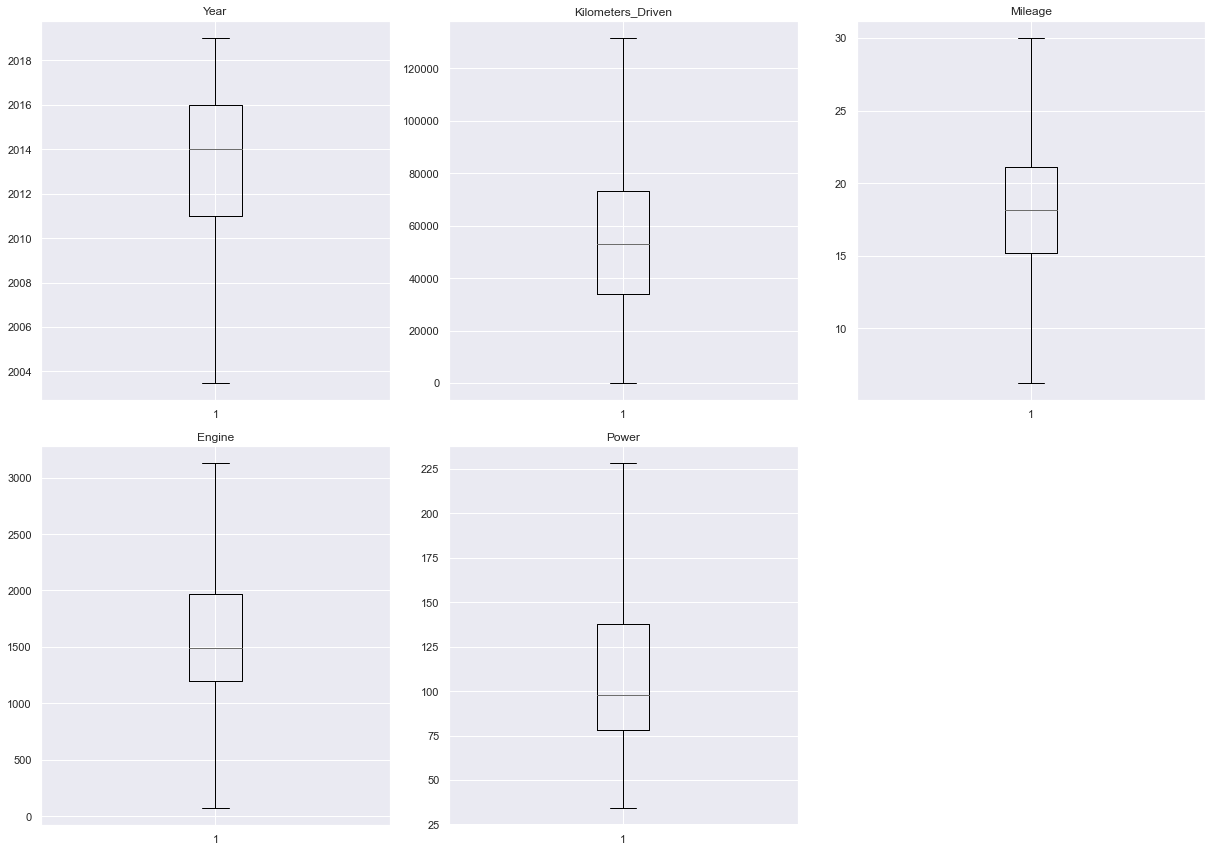

<IPython.core.display.Javascript object>

In [364]:
# Plotting the boxplot to chk if the outliers are fixed

plt.figure(figsize=(17, 12))

for i, variable in enumerate(num_col):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- All the outliers have bee floored and capped

# Feature Engineering

## Categorizing object datatypes

In [365]:
df["Location"] = df["Location"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")
df["Manufacturer"] = df["Manufacturer"].astype("category")

<IPython.core.display.Javascript object>

## Scaling/Normalization of continuous features

In [366]:
# Library required to do scaling

from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [367]:
# Scaling the continuous features w.r.t. the standard deviation

sc = StandardScaler()

df["Km_sc"] = sc.fit_transform(df[["Kilometers_Driven"]])
df["Mileage_sc"] = sc.fit_transform(df[["Mileage"]])
df["Engine_sc"] = sc.fit_transform(df[["Engine"]])
df["Power_sc"] = sc.fit_transform(df[["Power"]])

<IPython.core.display.Javascript object>

In [368]:
# Appling log transformation to the target variable

df["Log_Price"] = np.log(df["Price"])

<IPython.core.display.Javascript object>

In [369]:
df.dtypes

Location             category
Year                  float64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
Price                 float64
Manufacturer         category
Price_bin            category
Km_sc                 float64
Mileage_sc            float64
Engine_sc             float64
Power_sc              float64
Log_Price             float64
dtype: object

<IPython.core.display.Javascript object>

# Data Preparation for model building

In [370]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Price_bin,Km_sc,Mileage_sc,Engine_sc,Power_sc,Log_Price
S.No.,,,,,,,,,,,,,,,,,,
0,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,1-5L,0.529098,1.943857,-1.081849,-1.144344,0.559616
1,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,10-15L,-0.502924,0.340328,-0.053308,0.333729,2.525729
2,Chennai,2011.0,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,1-5L,-0.336469,0.000186,-0.727848,-0.480906,1.504077
3,Chennai,2012.0,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,5-10L,1.028463,0.594857,-0.641549,-0.479602,1.791759
4,Coimbatore,2013.0,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,15-19L,-0.513910,-0.693983,0.626516,0.650893,2.875822


<IPython.core.display.Javascript object>

In [371]:
df.shape

(6019, 18)

<IPython.core.display.Javascript object>

In [372]:
# Ordinal Encoding the categorical column Manufacturer w.r.t Price
# i.e. Ranking the car based on Price

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[("<1L", "1-5L", "5-10L", "10-15L", "15-19L", ">19L")])
df["CarRank"] = oe.fit_transform(df[["Price_bin"]])

<IPython.core.display.Javascript object>

In [373]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Price_bin,Km_sc,Mileage_sc,Engine_sc,Power_sc,Log_Price,CarRank
S.No.,,,,,,,,,,,,,,,,,,,
0,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,1-5L,0.529098,1.943857,-1.081849,-1.144344,0.559616,1.0
1,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,10-15L,-0.502924,0.340328,-0.053308,0.333729,2.525729,3.0
2,Chennai,2011.0,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,1-5L,-0.336469,0.000186,-0.727848,-0.480906,1.504077,1.0
3,Chennai,2012.0,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,5-10L,1.028463,0.594857,-0.641549,-0.479602,1.791759,2.0
4,Coimbatore,2013.0,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,15-19L,-0.513910,-0.693983,0.626516,0.650893,2.875822,4.0


<IPython.core.display.Javascript object>

In [374]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'Manufacturer', 'Price_bin', 'Km_sc', 'Mileage_sc', 'Engine_sc',
       'Power_sc', 'Log_Price', 'CarRank'],
      dtype='object')

<IPython.core.display.Javascript object>

## Defining X and y variables

In [375]:
X = df.drop(
    [
        "Kilometers_Driven",
        "Mileage",
        "Engine",
        "Power",
        "Manufacturer",
        "Price",
        "Price_bin",
        "Log_Price",
    ],
    axis=1,
)
y = df[["Log_Price"]]

print(X.head())
print(y.head())

         Location    Year Fuel_Type Transmission Owner_Type  Seats     Km_sc  \
S.No.                                                                          
0          Mumbai  2010.0       CNG       Manual      First    5.0  0.529098   
1            Pune  2015.0    Diesel       Manual      First    5.0 -0.502924   
2         Chennai  2011.0    Petrol       Manual      First    5.0 -0.336469   
3         Chennai  2012.0    Diesel       Manual      First    7.0  1.028463   
4      Coimbatore  2013.0    Diesel    Automatic     Second    5.0 -0.513910   

       Mileage_sc  Engine_sc  Power_sc  CarRank  
S.No.                                            
0        1.943857  -1.081849 -1.144344      1.0  
1        0.340328  -0.053308  0.333729      3.0  
2        0.000186  -0.727848 -0.480906      1.0  
3        0.594857  -0.641549 -0.479602      2.0  
4       -0.693983   0.626516  0.650893      4.0  
       Log_Price
S.No.           
0       0.559616
1       2.525729
2       1.504077
3   

<IPython.core.display.Javascript object>

In [376]:
print(X.shape)
print(y.shape)

(6019, 11)
(6019, 1)


<IPython.core.display.Javascript object>

## Creating dummy variables

In [377]:
X = pd.get_dummies(
    X, columns=["Location", "Fuel_Type", "Transmission", "Owner_Type"], drop_first=True,
)

<IPython.core.display.Javascript object>

In [378]:
X.head()

,Year,Seats,Km_sc,Mileage_sc,Engine_sc,Power_sc,CarRank,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,
0,2010.0,5.0,0.529098,1.943857,-1.081849,-1.144344,1.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015.0,5.0,-0.502924,0.340328,-0.053308,0.333729,3.0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011.0,5.0,-0.336469,0.000186,-0.727848,-0.480906,1.0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012.0,7.0,1.028463,0.594857,-0.641549,-0.479602,2.0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013.0,5.0,-0.513910,-0.693983,0.626516,0.650893,4.0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

## Train and Test data

In [379]:
# Library required for splitting the data into train and test set

from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [380]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [381]:
X_train.head()

,Year,Seats,Km_sc,Mileage_sc,Engine_sc,Power_sc,CarRank,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,
4201,2011.0,5.0,0.695553,0.895663,-0.727848,-0.802415,1.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4383,2016.0,5.0,-1.203800,0.499987,-0.731370,-0.693797,1.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1779,2014.0,7.0,0.494575,-0.717122,0.998130,0.633514,2.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4020,2013.0,5.0,1.967103,1.619912,-0.641549,-0.800242,1.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3248,2011.0,5.0,0.088058,-0.400118,-0.729609,-0.802415,1.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


<IPython.core.display.Javascript object>

In [382]:
X_train.shape

(4213, 25)

<IPython.core.display.Javascript object>

## Choose, train and evaluate the model

In [383]:
# Library required for model building

from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>

In [384]:
# Fitting the model on the train data

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [385]:
# Checking the coefficients nad intercept of the model

cf = pd.DataFrame(
    np.append(linear.coef_[0], linear.intercept_[0]),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
cf

,Coefficients
Year,0.079752
Seats,-0.013954
Km_sc,-0.023175
Mileage_sc,0.004740
Engine_sc,0.135410
Power_sc,0.190888
CarRank,0.305422
Location_Bangalore,0.081312
Location_Chennai,-0.007616
Location_Coimbatore,0.033509


<IPython.core.display.Javascript object>

## Model Performance Check

In [386]:
# defining function for MAPE


def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# Defining common function for all metrics


def model_perf(model, inp, out):
    y_pred = np.exp(model.predict(inp).flatten())
    y_act = np.exp(out.values.flatten())

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

<IPython.core.display.Javascript object>

In [387]:
# Performance chk on training data

print("Train Performance")
model_perf(linear, X_train, y_train)

Train Performance


,MAE,MAPE,RMSE,R^2
0,1.724275,16.752936,4.401719,0.846314


<IPython.core.display.Javascript object>

In [388]:
# Performance chk on test data

print("Test Performance")
model_perf(linear, X_test, y_test)

Test Performance


,MAE,MAPE,RMSE,R^2
0,1.655029,17.378988,3.776753,0.884032


<IPython.core.display.Javascript object>

**Observations**

- The training and testing scores are 84% and 88% respectively and both the scores are comparable. Hence, the model is a good fit.
- R^2 on the test set is 0.884 i.e., the model explains 88% of total variation in the test dataset. Hence, overall the model is very satisfactory.
- MAE indicates that the current model is able to predict the used cars price within an mean error of 1.6L on the test data.
- MAPE on the test set suggests we can predict within 17% of the car price.

# Linear Regression using Statsmodels

In [389]:
# Library required to build the statsmodel

import statsmodels.api as sm

<IPython.core.display.Javascript object>

In [390]:
# adding the constant manually

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [391]:
olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     2475.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:54:45   Log-Likelihood:                 431.96
No. Observations:                4213   AIC:                            -811.9
Df Residuals:                    4187   BIC:                            -646.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient show that the car price decreases with the increase of the corresponding attribute value.
- Positive values of the coefficient show that the car price increases with the increase of the corresponding attribute value.
- p-value of a variable indicates if the variable is significant or not. If we consider the significane level to be 0.05, then any variable with a p-value less than 0.05 would be considered significant.

## Checking Linear Regression Assumptions

- Checking for the below assumptios :

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedasticity
4. Linearity of variables
5. Normality of error terms

## Test for Multicollinearity - Variation Inflation Factor (VIF)

In [392]:
# Library required to test for Variation Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

In [393]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF SCores : \n\n{}\n".format(vif_series1))

VIF SCores : 

const                        974281.680473
Year                              2.499065
Seats                             1.780269
Km_sc                             1.948638
Mileage_sc                        3.211121
Engine_sc                         7.428543
Power_sc                          7.136644
CarRank                           4.996886
Location_Bangalore                2.477710
Location_Chennai                  2.991946
Location_Coimbatore               3.526992
Location_Delhi                    3.166905
Location_Hyderabad                3.837555
Location_Jaipur                   2.684908
Location_Kochi                    3.572195
Location_Kolkata                  3.158337
Location_Mumbai                   3.996683
Location_Pune                     3.441382
Fuel_Type_Diesel                 28.276124
Fuel_Type_Electric                1.044776
Fuel_Type_LPG                     1.192178
Fuel_Type_Petrol                 28.887461
Transmission_Manual               2.152

<IPython.core.display.Javascript object>

**Observations**

- Both Engine_sc and Power_sc have a VIF score above 5, which indicates that these variables are collinear. 

### Removing Multicollinearity

#### Removing Engine

In [394]:
X_train2 = X_train1.drop("Engine_sc", axis=1)
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF SCores : \n\n{}\n".format(vif_series1))

VIF SCores : 

const                        976901.397802
Year                              2.461412
Seats                             1.582515
Km_sc                             1.919657
Mileage_sc                        2.828860
Power_sc                          4.567039
CarRank                           4.966064
Location_Bangalore                2.586677
Location_Chennai                  3.000041
Location_Coimbatore               3.589859
Location_Delhi                    3.246941
Location_Hyderabad                3.904053
Location_Jaipur                   2.693083
Location_Kochi                    3.649405
Location_Kolkata                  3.232131
Location_Mumbai                   4.040745
Location_Pune                     3.519257
Fuel_Type_Diesel                 28.473290
Fuel_Type_Electric                1.035994
Fuel_Type_LPG                     1.223444
Fuel_Type_Petrol                 29.077030
Transmission_Manual               2.145527
Owner_Type_Fourth & Above         1.009

<IPython.core.display.Javascript object>

In [395]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     2447.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:54:57   Log-Likelihood:                 328.38
No. Observations:                4213   AIC:                            -606.8
Df Residuals:                    4188   BIC:                            -448.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

**Observations**

- R^2 is 0.933

#### Removing Power

In [396]:
X_train3 = X_train1.drop("Power_sc", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series3))

VIF Scores: 

const                        968187.276546
Year                              2.440723
Seats                             1.683831
Km_sc                             1.927484
Mileage_sc                        3.361610
Engine_sc                         4.955597
CarRank                           4.166324
Location_Bangalore                2.586701
Location_Chennai                  2.999782
Location_Coimbatore               3.589295
Location_Delhi                    3.246546
Location_Hyderabad                3.896732
Location_Jaipur                   2.692238
Location_Kochi                    3.649736
Location_Kolkata                  3.226853
Location_Mumbai                   4.041825
Location_Pune                     3.519039
Fuel_Type_Diesel                 28.485204
Fuel_Type_Electric                1.042408
Fuel_Type_LPG                     1.225587
Fuel_Type_Petrol                 29.265266
Transmission_Manual               2.012561
Owner_Type_Fourth & Above         1.0097

<IPython.core.display.Javascript object>

In [397]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     2313.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:55:26   Log-Likelihood:                 218.38
No. Observations:                4213   AIC:                            -386.8
Df Residuals:                    4188   BIC:                            -228.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

**Observations**

- R^2 is 0.930. Hence, we proceed with oldmod1

#### Continuing with olsmod1

In [398]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     2447.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:57:35   Log-Likelihood:                 328.38
No. Observations:                4213   AIC:                            -606.8
Df Residuals:                    4188   BIC:                            -448.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

In [399]:
X_train4 = X_train2.drop("Location_Chennai", axis=1)

<IPython.core.display.Javascript object>

In [400]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     2554.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:57:54   Log-Likelihood:                 328.37
No. Observations:                4213   AIC:                            -608.7
Df Residuals:                    4189   BIC:                            -456.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

In [401]:
X_train5 = X_train4.drop("Location_Mumbai", axis=1)

<IPython.core.display.Javascript object>

In [402]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     2670.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:58:07   Log-Likelihood:                 327.98
No. Observations:                4213   AIC:                            -610.0
Df Residuals:                    4190   BIC:                            -464.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

In [403]:
X_train6 = X_train5.drop("Owner_Type_Fourth & Above", axis=1)

<IPython.core.display.Javascript object>

In [404]:
olsmod5 = sm.OLS(y_train, X_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     2798.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:58:09   Log-Likelihood:                 327.90
No. Observations:                4213   AIC:                            -611.8
Df Residuals:                    4191   BIC:                            -472.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -158.4818    

<IPython.core.display.Javascript object>

In [405]:
X_train7 = X_train6.drop("Fuel_Type_Petrol", axis=1)

<IPython.core.display.Javascript object>

In [406]:
olsmod6 = sm.OLS(y_train, X_train7)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     2937.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:58:11   Log-Likelihood:                 327.33
No. Observations:                4213   AIC:                            -612.7
Df Residuals:                    4192   BIC:                            -479.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -158.3676    

<IPython.core.display.Javascript object>

In [407]:
X_train8 = X_train7.drop("Fuel_Type_LPG", axis=1)

<IPython.core.display.Javascript object>

In [408]:
olsmod7 = sm.OLS(y_train, X_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     3092.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:58:14   Log-Likelihood:                 326.86
No. Observations:                4213   AIC:                            -613.7
Df Residuals:                    4193   BIC:                            -486.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -158.5091    

<IPython.core.display.Javascript object>

**Observations**

- Now no feature has p-value greater than 0.05. Hence,the features in X_train8 are the final ones and olsres7 is the final model.

## Residual Mean

In [409]:
residual = olsres7.resid
np.mean(residual)

-1.900287032722531e-13

<IPython.core.display.Javascript object>

- Mean of residuals is very colse to 0

## Linearity Test

In [410]:
residual = olsres7.resid
fitted = olsres7.fittedvalues  # predicted values

<IPython.core.display.Javascript object>

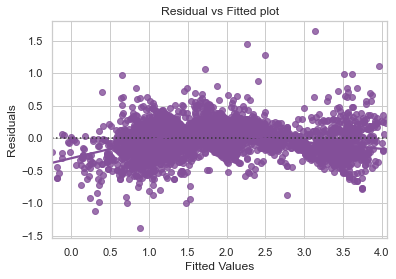

<IPython.core.display.Javascript object>

In [411]:
sns.set_style("whitegrid")
sns.residplot(fitted, residual, lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

**Observations**

- Scatter plot shows the distribution of residuals vs predicted values.
- There is no significant pattern in the plot above. Hence, the assumption is satisfied.

## Test for Normality

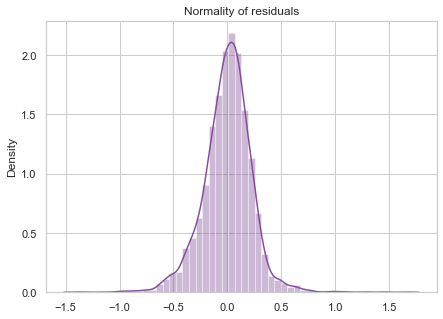

<IPython.core.display.Javascript object>

In [412]:
plt.figure(figsize=(7, 5))
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

- The residuals show a normal distribution. Hence, this assumption is satisfied.

## QQ Probability Plot

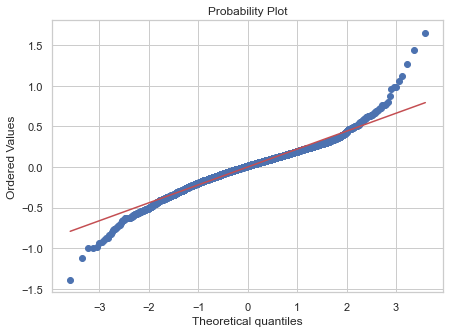

<IPython.core.display.Javascript object>

In [413]:
import pylab
import scipy.stats as stats

plt.figure(figsize=(7, 5))
stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

In [414]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9689437747001648, pvalue=2.905674280294774e-29)

<IPython.core.display.Javascript object>

**Observations**

- The residuals are not normal as per shapiro test, but as per QQ plot they are almost normal.
- As shapiro test has issues with larger dataset, we can go by the QQ plot and state that the residuals are normal. 

## Test for Homoscedasticity

For goldfeldquandt test, the hypothesis is defined as follows:

- Null Hypothesis : Residuals are homoscedastic
- Alternate Hypothesis : Residuals have heteroscedasticity

In [415]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train8)
lzip(name, test)

[('F statistic', 0.9148260377362365), ('p-value', 0.9789642138424763)]

<IPython.core.display.Javascript object>

**Observations**

- Since the p-value > 0.05, we can conclude that the residuals are homoscedastic. The assumption is therefore valid in the data.

## Predicting on the Test data

In [416]:
X_train8.columns

Index(['const', 'Year', 'Seats', 'Km_sc', 'Mileage_sc', 'Power_sc', 'CarRank',
       'Location_Bangalore', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Transmission_Manual', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

<IPython.core.display.Javascript object>

In [417]:
# Selecting columns from the test data on which the final model was created

X_test_final = X_test[X_train8.columns]

<IPython.core.display.Javascript object>

In [418]:
X_test_final.head()

,const,Year,Seats,Km_sc,Mileage_sc,Power_sc,CarRank,Location_Bangalore,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Transmission_Manual,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,
2868,1.0,2013.0,5.0,0.429225,1.203411,-0.800242,2.0,0,0,0,1,0,0,0,0,1,0,1,0,0
5924,1.0,2017.0,7.0,-0.977621,-0.647705,0.199043,3.0,0,0,0,0,0,1,0,0,1,0,1,0,0
3764,1.0,2014.0,7.0,0.995172,-0.717122,0.633514,2.0,0,0,1,0,0,0,0,0,1,0,1,0,0
4144,1.0,2016.0,5.0,-0.136723,1.573634,-0.908643,1.0,0,0,0,0,0,0,0,1,1,0,1,1,0
2780,1.0,2009.0,5.0,1.461246,-2.759133,-0.285393,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0


<IPython.core.display.Javascript object>

In [419]:
# Checking model performance on train set (seen 70% data)

print("Train Performance\n")
model_perf(olsres7, X_train8.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,1.786766,17.129228,4.642187,0.829064


<IPython.core.display.Javascript object>

In [420]:
# Checking model performance on test set (unseen 30%)

print("Test Performance\n")
model_perf(olsres7, X_test_final.values, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,1.7226,17.689368,3.990802,0.870515


<IPython.core.display.Javascript object>

**Observations**

- The model has low test and train RMSE and MAE, and both the errors are comparable. So, the model is not suffering from overfitting.
- The model is able to explain 87% of the variation on the test set, which is good.
- The MAPE on the test set suggests we can predict within 17% of the price.

### Hence, the model olsres7is good for prediction as well as inference purposes.

### Printing the model summary

In [421]:
olsmod7 = sm.OLS(y_train, X_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     3092.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:00:59   Log-Likelihood:                 326.86
No. Observations:                4213   AIC:                            -613.7
Df Residuals:                    4193   BIC:                            -486.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -158.5091    

<IPython.core.display.Javascript object>

# Conclusion

##### olsres7 is the final model which follows all the assumptions, and can be used for interpretations.

1. Price of used cars turn out to be very significant,
2. There are two variables - Kilometers_Driven and Power which affect the price of the used cars.
3. As the power (bhp) of the car increases, price increases.
4. Newer the model of the car, higher is the price
5. Fuel type Electric and Diesel have positive coefficients. So, price of electric and diesel cars will increase.

## Key insights from EDA

1. Maruti is the highest selling car brand followed by Hyundai and Honda
2. Coimbatore and Bangalore have high market price but low number of cars in stock 
3. Kochi has has the third highest price in market
4. Mumbai on the other hand, has large number of cars with comparatively low price
5. Diesel cars are over the edge in fuel type
6. Automatic transmission cars have good prices 
7. Owner_Type_First cars have higher price than the rest
8. 5 seaters (sedan) have higher number of cars in the market
9. Cars within price ranges 1-5L and 5-10L have good sales followed by high-end models above 19L
10. Only about 92 cars under 1L have been sold.
11. Cars with higher selling prices include diesel cars, automatic transmission cars, electric and sports cars (2 seaters)

# Recommendations

1. Business has to concentrate on improving cars availability in locations Coimbatore, Bangalore and Kochi
2. Maintain balance between supply and demand in all locations
3. Stock up more cars with first owner type, fuel type diesel and price range between 1-10L